In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 5

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
23/29 [======================>.......] - ETA: 0s - loss: 1.7471 - accuracy: 0.1970
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 1s 12ms/step - loss: 1.7120 - accuracy: 0.2136 - val_loss: 1.5159 - val_accuracy: 0.3742
Epoch 2/1000
18/29 [=================>............] - ETA: 0s - loss: 1.5154 - accuracy: 0.3103
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1.4799 - accuracy: 0.3259 - val_loss: 1.3592 - val_accuracy: 0.4224
Epoch 3/1000
18/29 [=================>............] - ETA: 0s - loss: 1.3746 - accuracy: 0.3689
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1.3626 - accuracy: 0.3755 - val_loss: 1.2660 - val_accuracy: 0.4600
Epoch 4/1000
17/29 [================>.............] - ETA: 0s - loss: 1.3111 - accuracy: 0.3966


27/29 [==========================>...] - ETA: 0s - loss: 0.7900 - accuracy: 0.6771
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.7944 - accuracy: 0.6749 - val_loss: 0.5337 - val_accuracy: 0.8399
Epoch 29/1000
29/29 [==============================] - ETA: 0s - loss: 0.7969 - accuracy: 0.6722
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.7969 - accuracy: 0.6722 - val_loss: 0.5339 - val_accuracy: 0.8317
Epoch 30/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.7809 - accuracy: 0.6797
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.7793 - accuracy: 0.6796 - val_loss: 0.5192 - val_accuracy: 0.8538
Epoch 31/1000
27/29 [==========================>...] - ETA: 0s - loss: 0.7750 - accuracy: 0.6774
Epoch 31

26/29 [=========================>....] - ETA: 0s - loss: 0.6759 - accuracy: 0.7251
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.6814 - accuracy: 0.7223 - val_loss: 0.3931 - val_accuracy: 0.9118
Epoch 56/1000
25/29 [========================>.....] - ETA: 0s - loss: 0.6805 - accuracy: 0.7331
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.7327 - val_loss: 0.3973 - val_accuracy: 0.9052
Epoch 57/1000
26/29 [=========================>....] - ETA: 0s - loss: 0.6761 - accuracy: 0.7374
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.6796 - accuracy: 0.7332 - val_loss: 0.3874 - val_accuracy: 0.9191
Epoch 58/1000
27/29 [==========================>...] - ETA: 0s - loss: 0.6621 - accuracy: 0.7326
Epoch 58

15/29 [==============>...............] - ETA: 0s - loss: 0.6397 - accuracy: 0.7510
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.6221 - accuracy: 0.7572 - val_loss: 0.3411 - val_accuracy: 0.9257
Epoch 83/1000
17/29 [================>.............] - ETA: 0s - loss: 0.6073 - accuracy: 0.7624
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.6040 - accuracy: 0.7676 - val_loss: 0.3340 - val_accuracy: 0.9297
Epoch 84/1000
17/29 [================>.............] - ETA: 0s - loss: 0.6021 - accuracy: 0.7610
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.6173 - accuracy: 0.7556 - val_loss: 0.3334 - val_accuracy: 0.9289
Epoch 85/1000
29/29 [==============================] - ETA: 0s - loss: 0.6032 - accuracy: 0.7736
Epoch 85

29/29 [==============================] - ETA: 0s - loss: 0.6033 - accuracy: 0.7695
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.6033 - accuracy: 0.7695 - val_loss: 0.3060 - val_accuracy: 0.9461
Epoch 110/1000
14/29 [=============>................] - ETA: 0s - loss: 0.5962 - accuracy: 0.7829
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.5926 - accuracy: 0.7807 - val_loss: 0.3033 - val_accuracy: 0.9420
Epoch 111/1000
17/29 [================>.............] - ETA: 0s - loss: 0.5775 - accuracy: 0.7854
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.5862 - accuracy: 0.7760 - val_loss: 0.2987 - val_accuracy: 0.9461
Epoch 112/1000
16/29 [===============>..............] - ETA: 0s - loss: 0.5610 - accuracy: 0.7715
Ep

Epoch 136/1000
29/29 [==============================] - ETA: 0s - loss: 0.5735 - accuracy: 0.7777
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.5735 - accuracy: 0.7777 - val_loss: 0.2760 - val_accuracy: 0.9428
Epoch 137/1000
16/29 [===============>..............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7900
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.5404 - accuracy: 0.7910 - val_loss: 0.2704 - val_accuracy: 0.9420
Epoch 138/1000
15/29 [==============>...............] - ETA: 0s - loss: 0.5441 - accuracy: 0.8042
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.5525 - accuracy: 0.7935 - val_loss: 0.2704 - val_accuracy: 0.9428
Epoch 139/1000
16/29 [===============>..............] - ETA: 0s - loss: 0.5390 - accu

Epoch 163/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.5498 - accuracy: 0.7905
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.5516 - accuracy: 0.7899 - val_loss: 0.2590 - val_accuracy: 0.9363
Epoch 164/1000
15/29 [==============>...............] - ETA: 0s - loss: 0.5298 - accuracy: 0.8130
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.5298 - accuracy: 0.8057 - val_loss: 0.2546 - val_accuracy: 0.9428
Epoch 165/1000
17/29 [================>.............] - ETA: 0s - loss: 0.5239 - accuracy: 0.8107
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.5364 - accuracy: 0.8035 - val_loss: 0.2563 - val_accuracy: 0.9371
Epoch 166/1000
16/29 [===============>..............] - ETA: 0s - loss: 0.5310 - accu

Epoch 190/1000
29/29 [==============================] - ETA: 0s - loss: 0.5297 - accuracy: 0.8060
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.5297 - accuracy: 0.8060 - val_loss: 0.2529 - val_accuracy: 0.9453
Epoch 191/1000
28/29 [===========================>..] - ETA: 0s - loss: 0.5393 - accuracy: 0.8011
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 0.5364 - accuracy: 0.8014 - val_loss: 0.2396 - val_accuracy: 0.9428
Epoch 192/1000
16/29 [===============>..............] - ETA: 0s - loss: 0.5416 - accuracy: 0.7930
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 0.5314 - accuracy: 0.8019 - val_loss: 0.2493 - val_accuracy: 0.9444
Epoch 193/1000
16/29 [===============>..............] - ETA: 0s - loss: 0.5496 - accu

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.9412


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.5962864e-01 3.4414757e-02 2.9952623e-04 1.7678739e-06 5.6552845e-03]
0


# Confusion matrix

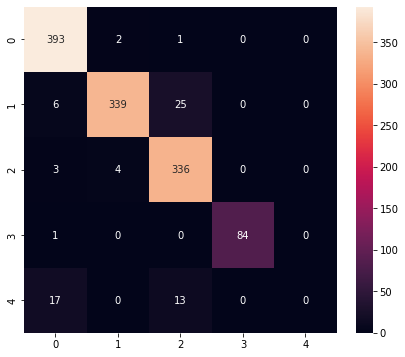

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       396
           1       0.98      0.92      0.95       370
           2       0.90      0.98      0.94       343
           3       1.00      0.99      0.99        85
           4       0.00      0.00      0.00        30

    accuracy                           0.94      1224
   macro avg       0.76      0.78      0.77      1224
weighted avg       0.92      0.94      0.93      1224



C:\Users\ryan6\Documents\Python Projects\Animatronic Hand\hand\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ryan6\Documents\Python Projects\Animatronic Hand\hand\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ryan6\Documents\Python Projects\Animatronic Hand\hand\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ryan6\AppData\Local\Temp\tmpaqw0sh5m\assets


INFO:tensorflow:Assets written to: C:\Users\ryan6\AppData\Local\Temp\tmpaqw0sh5m\assets


6480

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5962864e-01 3.4414764e-02 2.9952652e-04 1.7678789e-06 5.6552850e-03]
0
